In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
labels_df = pd.read_excel('aggregateRockData.xlsx', usecols=[1], header=None)
labels_df.columns = ['Category']

attributes_df = pd.read_csv('norm540.txt', sep='\t', usecols=range(3, 22), header=None)
attributes_df.columns = list('abcdefghijklmnopqrs')

# Combine the data
rock_df = pd.concat([labels_df, attributes_df], axis=1)

# Display statistical values
print(rock_df.head())

   Category         a         b         c         d         e         f  \
0         1  1.690468 -0.159688 -0.646115 -0.252007 -0.609794  0.579927   
1         1  1.690468 -0.159688 -0.530724  0.127922 -0.482150  2.865772   
2         1  1.665576 -0.407623  0.858984 -0.631936 -0.443857  2.611790   
3         1  2.233118 -0.407623 -0.415333 -0.424702 -1.120369  0.071962   
4         1  2.213204 -0.159688  1.129901 -0.044773 -1.082076  1.341876   

          g         h         i         j         k         l         m  \
0  0.375313 -0.352386 -0.260224 -0.759128 -0.013842 -0.540653  0.946521   
1  0.375313 -0.352386 -0.260224 -0.529150 -0.512160 -0.540653 -0.249084   
2 -0.405184 -0.352386 -0.260224 -0.529150 -0.512160 -0.540653  1.245422   
3  4.017633 -0.352386 -0.260224 -0.529150 -0.512160 -0.540653 -0.249084   
4  3.757467 -0.352386 -0.260224 -0.759128 -0.512160 -0.540653 -0.249084   

          n         o         p         q         r         s  
0 -0.227922 -0.225045 -0.116312  0

Q1- Statistical descriptions and Visualizations

In [ ]:
#print the dimension
print("\n The shape of the dataframe is " , rock_df.shape)
#print all columns
print("\n The columns that are present in the dataframe" , rock_df.columns)
#view the first 5 rows of the datafram
print("\n The first five rows of the dataframe :" )
rock_df.head(5)


 The shape of the dataframe is  (540, 20)

 The columns that are present in the dataframe Index(['Category', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's'],
      dtype='object')

 The first five rows of the dataframe :


,Category,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s
0,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,1,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,1,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
#Let's calculate the percentage of missing values in each column.
perc_missing = pd.DataFrame((rock_df.isna().sum()/len(rock_df)) * 100,columns = ["Perecentage Missing"])
perc_missing

,Perecentage Missing
Category,0.0
a,0.0
b,0.0
c,0.0
d,0.0
e,0.0
f,0.0
g,0.0
h,0.0
i,0.0


In [ ]:
rock_df.columns

Index(['Category', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's'],
      dtype='object')

In [ ]:
rock_df["Category"].value_counts()

1    180
2    180
3    180
Name: Category, dtype: int64

In [ ]:
def display_statistics_and_histograms(df):
    stats_data = []

    # Create a single figure for all histograms
    plt.figure(figsize=(13, 7))

    for i, col in enumerate(df.columns[1:], start=1):
        stats = df[col].describe()
        median = df[col].median()
        skew = df[col].skew()
        kurt = df[col].kurt()
        stats_data.append([col, stats['mean'], median, skew, kurt])

        plt.subplot(4, 6, i)
        sns.histplot(df[str(col)], kde=True)
        plt.title(f"{col}")

    plt.tight_layout()
    plt.show()

    stats_table = pd.DataFrame(stats_data, columns=['Attribute', 'Mean', 'Median', 'Skew', 'Kurt'])
    print(stats_table)

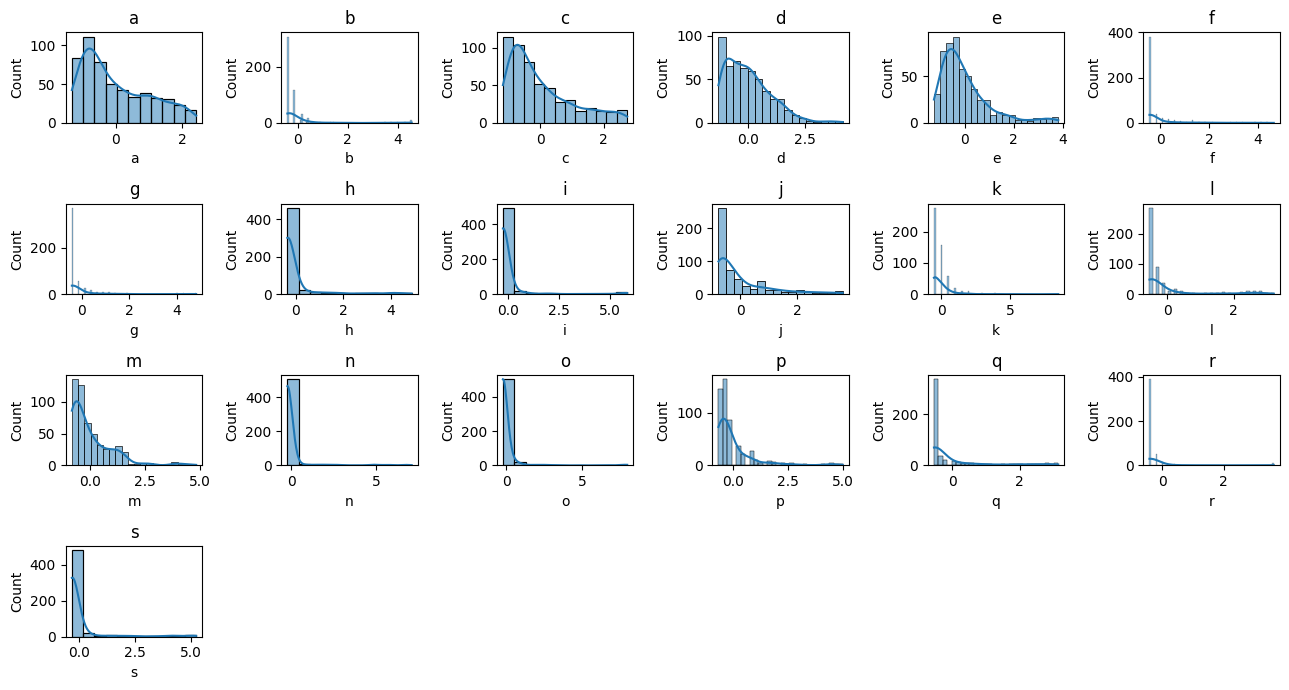

   Attribute          Mean    Median      Skew       Kurt
0          a -1.851852e-09 -0.300910  0.714977  -0.671929
1          b  9.629630e-08 -0.407623  3.620303  12.602147
2          c  5.370370e-08 -0.375197  1.097902   0.230668
3          d -6.296296e-08 -0.182929  1.039908   1.220311
4          e -4.074074e-08 -0.271538  1.715341   3.113322
5          f -1.537037e-07 -0.436004  2.813088   7.566127
6          g -1.666667e-08 -0.405184  3.380080  11.557374
7          h -1.814815e-07 -0.352386  3.384711  10.969463
8          i -1.481481e-08 -0.260224  4.753846  22.632414
9          j -1.166667e-07 -0.299173  1.739787   2.501931
10         k -1.629630e-07 -0.512160  4.845069  31.612381
11         l  1.703704e-07 -0.540653  2.003191   2.622970
12         m -6.851852e-08 -0.249084  1.944237   4.770206
13         n -5.555556e-09 -0.227922  5.221579  27.935174
14         o  3.388889e-07 -0.225045  6.373542  43.200038
15         p  1.203704e-07 -0.401124  2.786519   8.787105
16         q -

In [ ]:
display_statistics_and_histograms(rock_df)

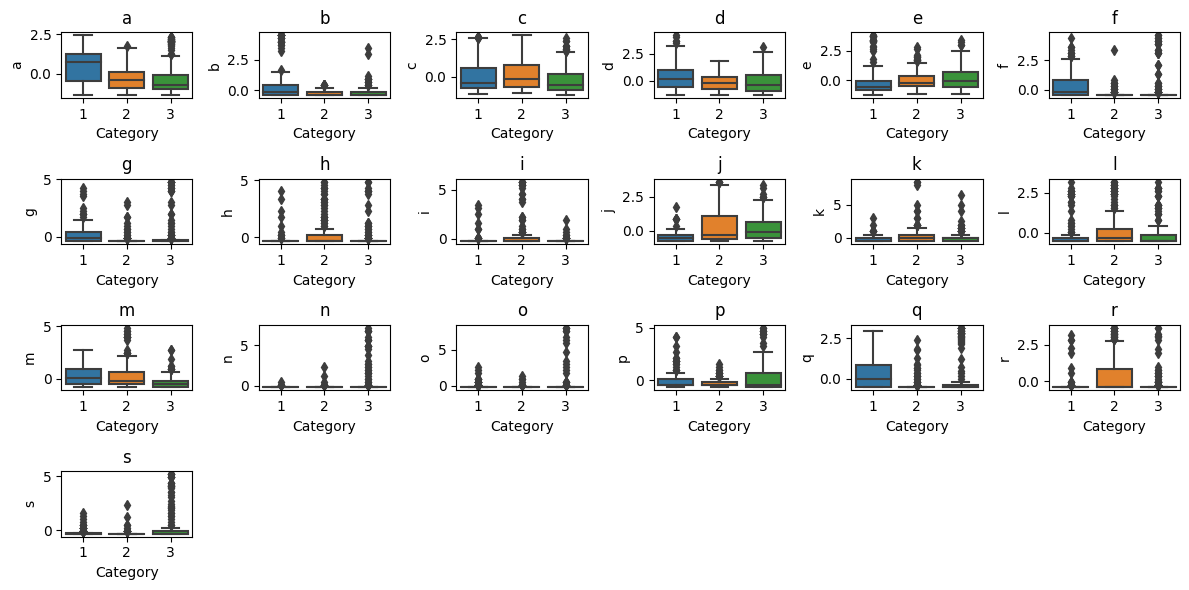

In [ ]:
def display_classification_insights(df):
    stats_data = []

    # Create a single figure for all histograms
    plt.figure(figsize=(12, 6))

    target_column = df.columns[0]  # Assuming the first column is the target variable

    for i, col in enumerate(df.columns[1:], start=1):
        stats = df[col].describe()
        median = df[col].median()
        skew = df[col].skew()
        kurt = df[col].kurt()
        null_values = df[col].isnull().sum()

        # Boxplot for attribute with respect to the target variable
        plt.subplot(4, 6, i)
        sns.boxplot(x=target_column, y=col, data=df)
        plt.title(f"{col}")

    plt.tight_layout()
    plt.show()

display_classification_insights(rock_df)

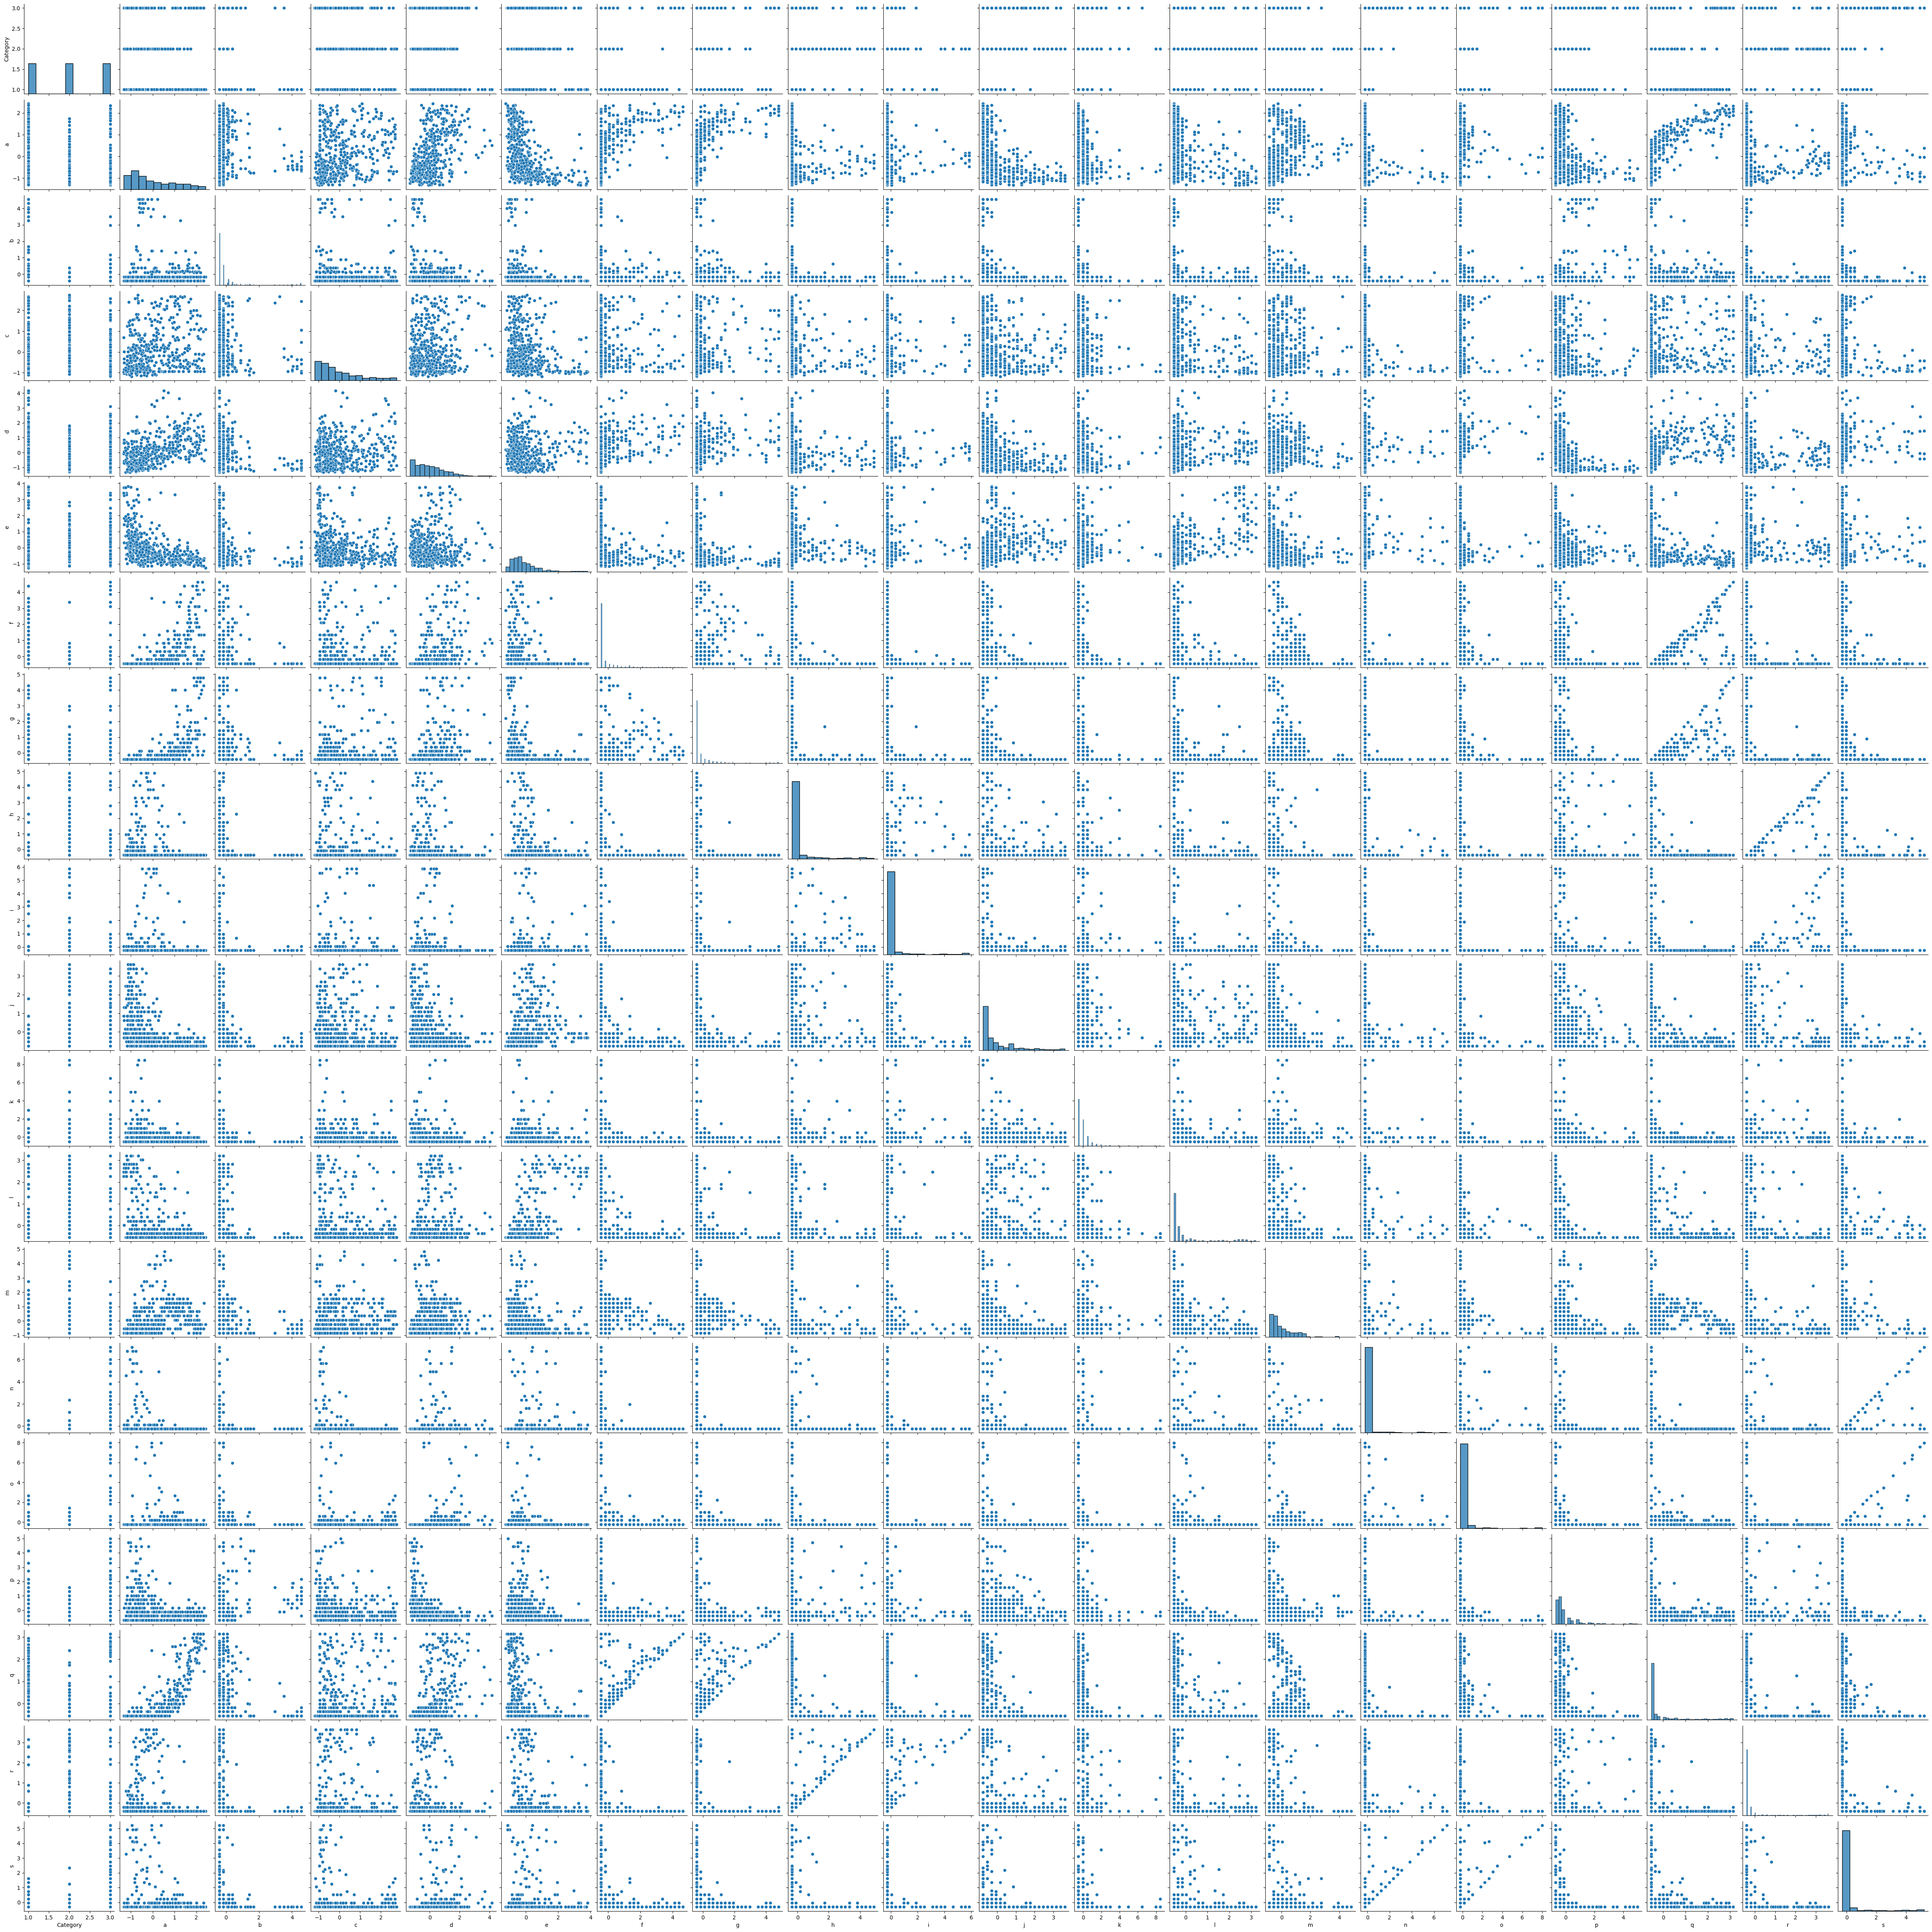

In [ ]:
#scatter plot between features
sns.pairplot(data=rock_df)

<Axes: >

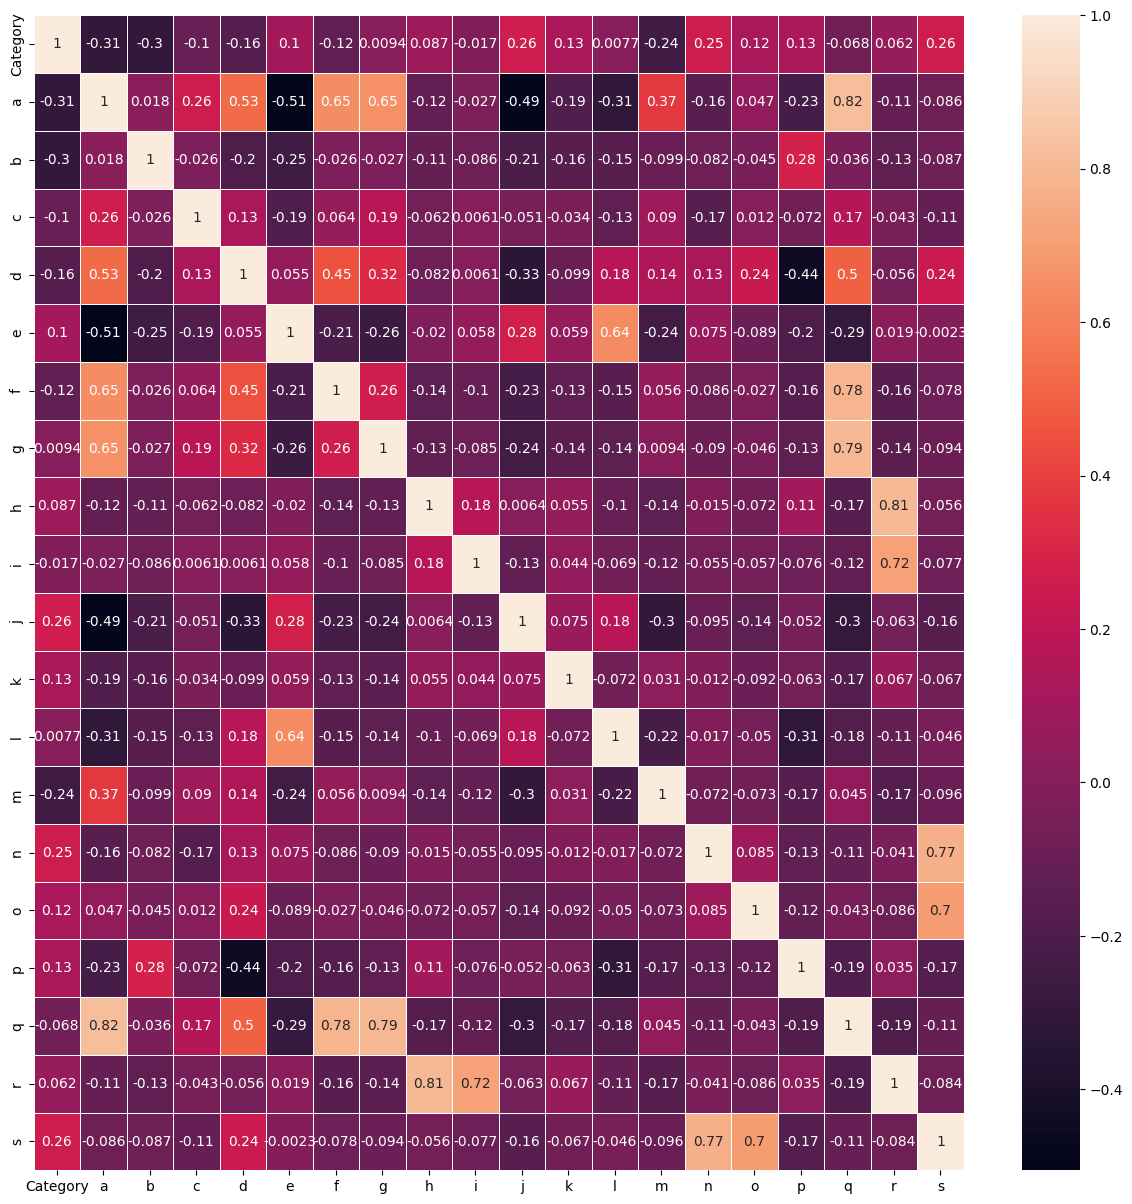

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(rock_df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

Q2- Computing the PCC:





In [ ]:
corr_matrix = rock_df.corr(method="pearson",numeric_only = True)
corr_matrix["Category"].sort_values(ascending = False)

Category    1.000000
j           0.262855
s           0.258386
n           0.253550
p           0.132240
k           0.130094
o           0.121163
e           0.103781
h           0.086923
r           0.061825
g           0.009450
l           0.007679
i          -0.016680
q          -0.068022
c          -0.104748
f          -0.123388
d          -0.164925
m          -0.242921
b          -0.301462
a          -0.305296
Name: Category, dtype: float64

Special treatment:Given the substantial quantity of attributes we need to manage before feeding the data to algorithms, PCA is employed to address this issue.

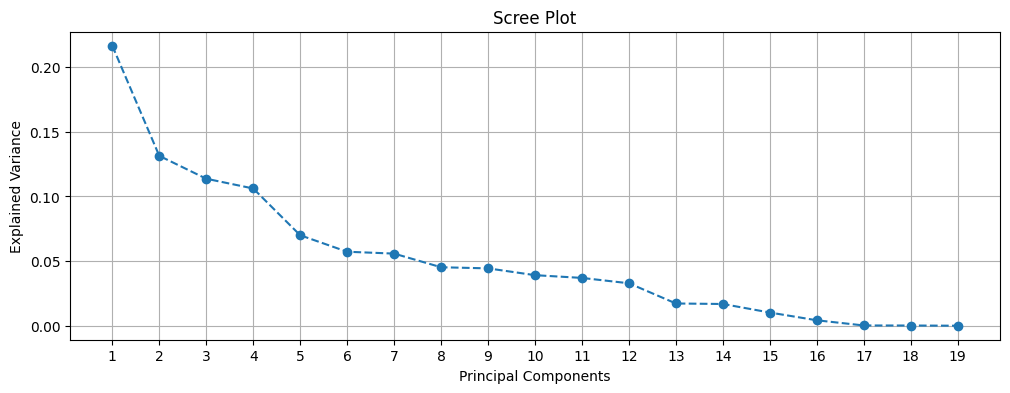

Number of components to keep 95% variance: 12


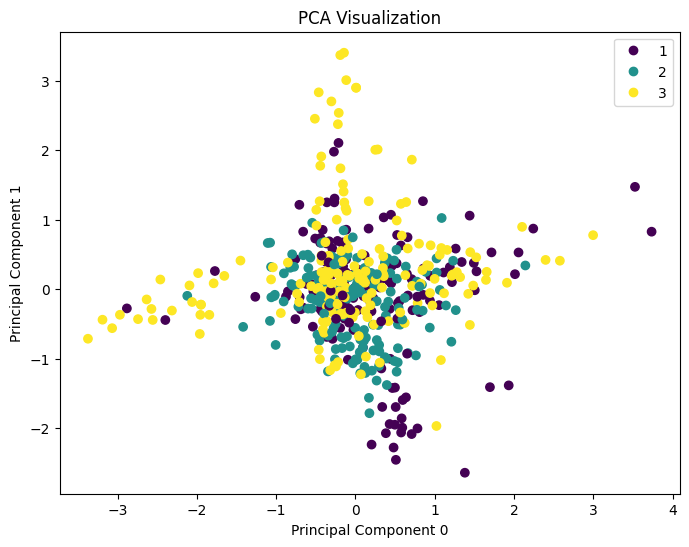

In [ ]:
# Separate labels and attributes
X = rock_df.iloc[:, 1:]  # Features (attributes)
y = rock_df['Category']  # Labels

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Create a custom range with more points on the x-axis
x = range(1, len(explained_variance) + 1)  # This is your current x-axis range
custom_x = range(1, len(explained_variance) + 1, 1)  # Adjust the step value (5 in this example)

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(x, explained_variance, marker='o', linestyle='--')

# Set custom x-ticks and labels
plt.xticks(custom_x)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid()

plt.show()

# Choose the number of components based on explained variance
cumulative_explained_variance = explained_variance.cumsum()
n_components = 0
for i, explained_var in enumerate(cumulative_explained_variance):
    if explained_var >= 0.95:
        n_components = i + 1
        break

print(f"Number of components to keep 95% variance: {n_components}")

# Perform PCA with the selected number of components
pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)


# Visualize the data in the reduced dimension
plt.figure(figsize=(8, 6))
plot= plt.scatter(X_pca[:, 10], X_pca[:, 11], c=y, cmap='viridis')
plt.legend(handles=plot.legend_elements()[0], labels=set(y))
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.title('PCA Visualization')
plt.show()

In [ ]:
X_pca.shape

(540, 12)

In [ ]:
y.shape

(540,)

In [ ]:
# Merge X_pca and y into a new DataFrame rock1_df
rock_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(X_pca.shape[1])])
rock_pca_df['Category'] = y

Q3- Splitting the data in testing , validation and training sets correctly

In [ ]:
train,test = train_test_split(rock_pca_df, test_size=0.2, stratify=rock_pca_df["Category"], random_state=42)

In [ ]:
train["Category"].value_counts()/len(train)

2    0.333333
1    0.333333
3    0.333333
Name: Category, dtype: float64

In [ ]:
test["Category"].value_counts()/len(test)

2    0.333333
1    0.333333
3    0.333333
Name: Category, dtype: float64

Q3- Verification- The data is split into training and testing sets, with 20% reserved for testing. The 'stratify' parameter is used to ensure that both the training and testing sets maintain the same proportion of each class, which is crucial for maintaining a representative sample when dealing with imbalanced data or classification problems. During grid search CV the training set is split in partly and is assigned as validation set.

Special treatment: Encoding target variable to easily handle processing of data

In [ ]:
x_train,x_test =train.drop(columns=["Category"]),test.drop(columns=["Category"])
y_train,y_test = train["Category"],test["Category"]
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

In [ ]:
x_train.shape

(432, 12)

In [ ]:
#one hot encoding for nominal and label encoder for ordinal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Specify the list of numeric features (e.g., PCs)
numeric_features = [f'PC{i}' for i in range(1, 11 + 1)]  # Replace n with the number of PCs you've retained

# Create a StandardScaler and transform your PCA data
scaler = StandardScaler()
x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])

In [ ]:
x_train.shape

(432, 12)

Question 4 a Multinomial Logistic Regression
Q4a differerent hyparameters- c, solver , iter

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
softmax_reg = LogisticRegression()

#automatic stratified split happens here
C = [0.000001, 0.00001, 0.0001,0.001,0.01, 0.1]
param_grid = {
    'C': C}
grid_search = GridSearchCV(softmax_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]

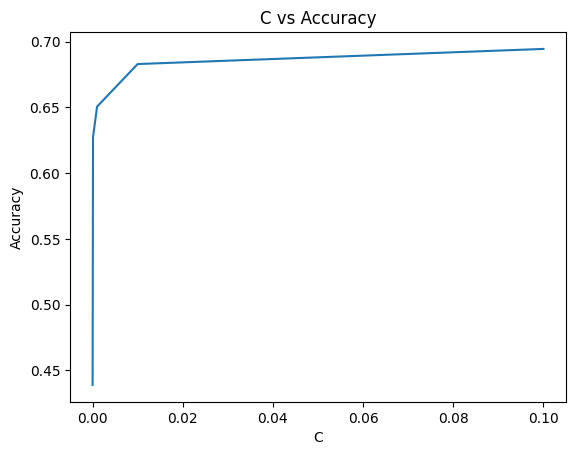

In [ ]:
sns.lineplot(x=C, y=accuracy_scores)
# Add labels and a title
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')

# Show the plot
plt.show()

One can see that, when C is small[regularization parameter), the accuracy is less. Lesses the
C, stronger the regularization. But as we increase C, the accuracy also increases, decreasing the
amount of regularization

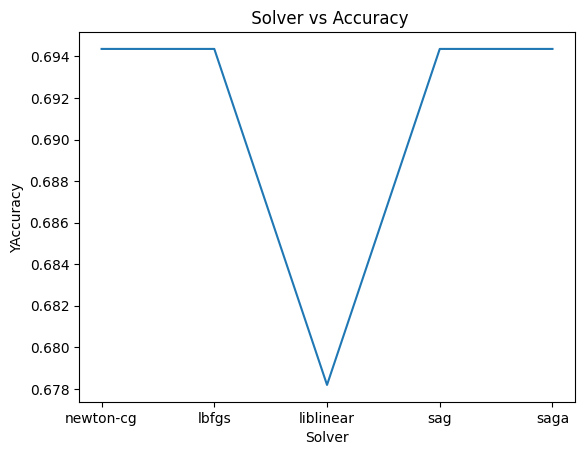

In [ ]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = {
    'solver': solver}
grid_search = GridSearchCV(softmax_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=solver, y=accuracy_scores)
# Add labels and a title
plt.xlabel('Solver')
plt.ylabel('YAccuracy')
plt.title(' Solver vs Accuracy')

# Show the plot
plt.show()

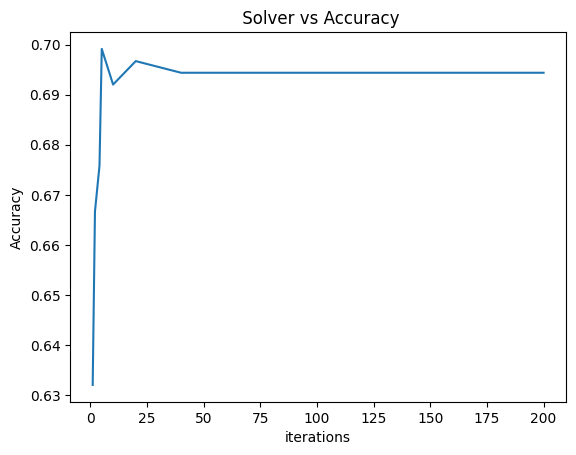

In [ ]:
max_iter= [1,2,4,5,10,20,40,50,100,200]
param_grid = {
    'max_iter': max_iter}
grid_search = GridSearchCV(softmax_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=max_iter, y=accuracy_scores)
# Add labels and a title
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.title(' Solver vs Accuracy')

# Show the plot
plt.show()

increasing the max_iter increases the accuracy scores. But after a particular range it becomes
constant. Logistic regression algorithms are trained using optimization Algorithms such as gradient
descent where the model converges to the local minima after certain number of iterations. hence
providing with ebough iteration is important

Q4a- Best hyperparameters

In [ ]:
#find best model
param_grid = {
    'C': [0.0001, 0.001, 0.01,0.1, 1.0, 10,20],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10,20,40,50,100,200, 300, 500]
}
grid_search = GridSearchCV(softmax_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 20, 'max_iter': 10, 'solver': 'lbfgs'}
accuracy : 0.7059609730018711


In [ ]:
best_parameters = {'C': 20, 'max_iter': 10, 'solver': 'lbfgs'}

Q4a- Training vs validation results

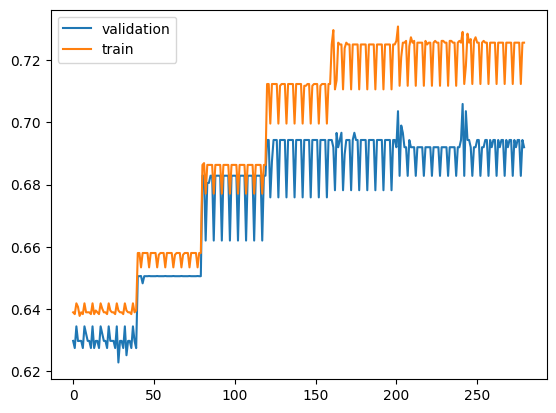

In [ ]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
plt.plot(validation_scores, label='validation')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Q4a Performance

In [ ]:
best_log_model = grid_search.best_estimator_
y_pred = best_log_model.predict(x_test)
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'
# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7026315789473685
Recall: 0.6944444444444444
F1 Score: 0.6957196430880641


Q4 b SVM
Model implementation

In [ ]:
#SVMs
from sklearn.svm import SVC
svm = SVC(probability=True)
param_grid = {
    'C': [0.01,0.1, 1,10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
}

Different hyperparameters

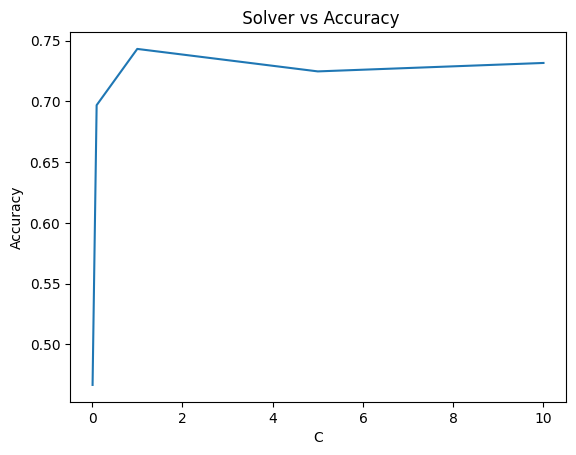

In [ ]:
C=[0.01,0.1,5, 1.0,10.0]
param_grid = {
    'C': C}
grid_search = GridSearchCV(svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=C, y=accuracy_scores)
# Add labels and a title
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title(' Solver vs Accuracy')
# Show the plot
plt.show()

One can see that, when C is small[regularization parameter), the accuracy is less. Lesses the
C, stronger the regularization. But as we increase C, the accuracy also increases, decreasing the
amount of regularization

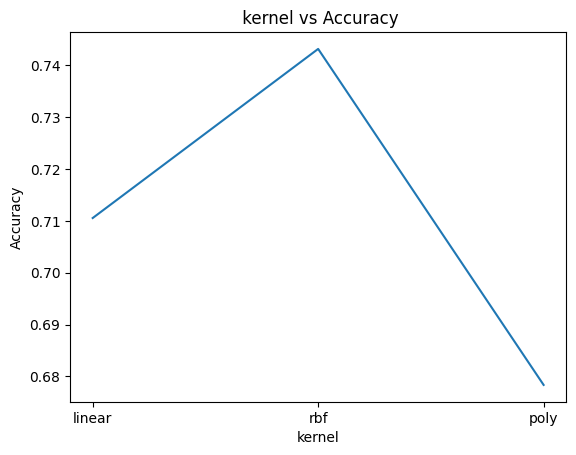

In [ ]:
kernel=['linear', 'rbf', 'poly']
param_grid = {
    'kernel': kernel}
grid_search = GridSearchCV(svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=kernel, y=accuracy_scores)
# Add labels and a title
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.title(' kernel vs Accuracy')
# Show the plot
plt.show()

Ine can see that rbf kernel has higher accuracy compared to other kernels.Because the use case in
hand is complex and may have decision boundaries that are complex, rbf kernel with its ability to
create non linear transformation has performed better.

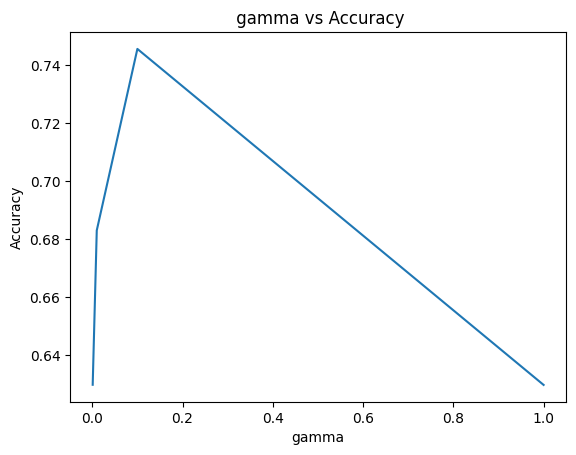

In [ ]:
gamma= [0.001, 0.01, 0.1, 1]
param_grid = {
    'gamma': gamma}
grid_search = GridSearchCV(svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=gamma, y=accuracy_scores)
# Add labels and a title
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title(' gamma vs Accuracy')
# Show the plot
plt.show()

gamma parameter defines how smooth and generalized athe decsion bounday has to be. Higher the
gamma, closely it fits to the training samples leading to overfitting which in turn decrease accuracy

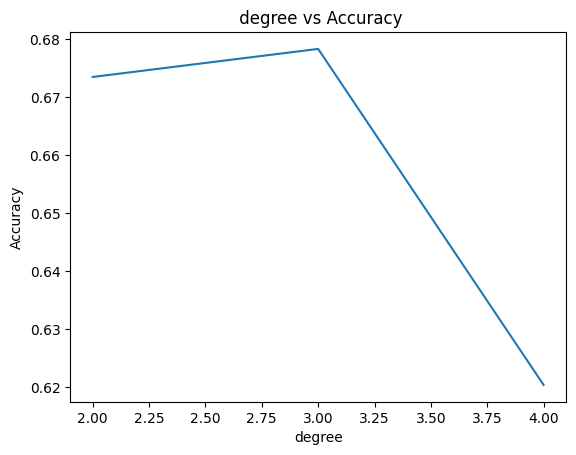

In [ ]:
degree= [2, 3, 4]
param_grid = {
    'degree': degree}
grid_search = GridSearchCV(SVC(kernel="poly"), param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=degree, y=accuracy_scores)
# Add labels and a title
plt.xlabel('degree')
plt.ylabel('Accuracy')
plt.title(' degree vs Accuracy')
# Show the plot
plt.show()

a lower polynomial degree is used when the variables are linearly separable.Increasing the number
of degress leads to model being overft, which inturn reduces the testing accuracy.

Best hyperparamter/model

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.7106481481481481


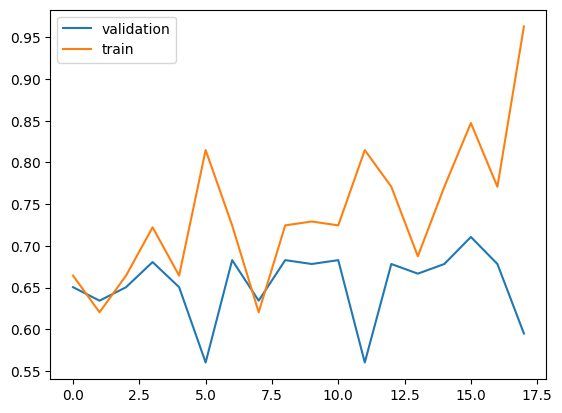

In [ ]:
#best model
svc = SVC(probability=True)
param_grid = {
    'C': [0.01,0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(svc, param_grid=param_grid,
                           cv=2, n_jobs=-1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
plt.plot(validation_scores, label='validation')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Performance testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test)
# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Precision: 0.7207861086893347
Recall: 0.7129629629629629
F1 Score: 0.7147266551166304
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.65      0.67      0.66        36
           2       0.68      0.75      0.71        36

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108



Q4c Random forrest

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [ ]:
rf_clf = RandomForestClassifier()

Different hyperparameters

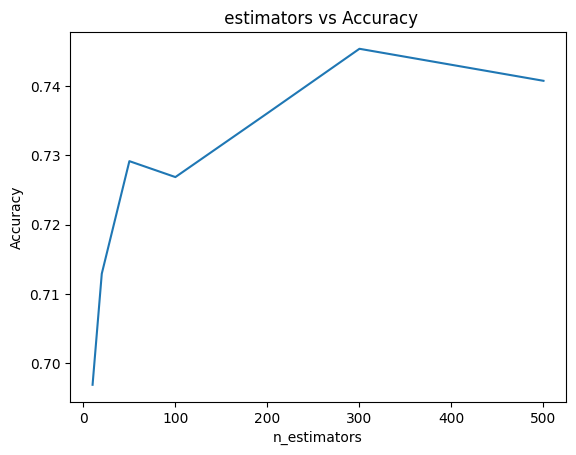

In [ ]:
n_estimators=[10,20,50, 100, 200, 300, 500]
param_grid = {
    'n_estimators': n_estimators}
grid_search = GridSearchCV(rf_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=n_estimators, y=accuracy_scores)
# Add labels and a title
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title(' estimators vs Accuracy')
# Show the plot
plt.show()

n_estimators defines the number of decision trees that needs to be created. higher the decsion
tree, the probability of overfitting increases, and lower it is, the model might be underfit. In this
scenario, one can see that the accuracy starts to decrease when estimators increase from 300-500,
which means the model is overfitting

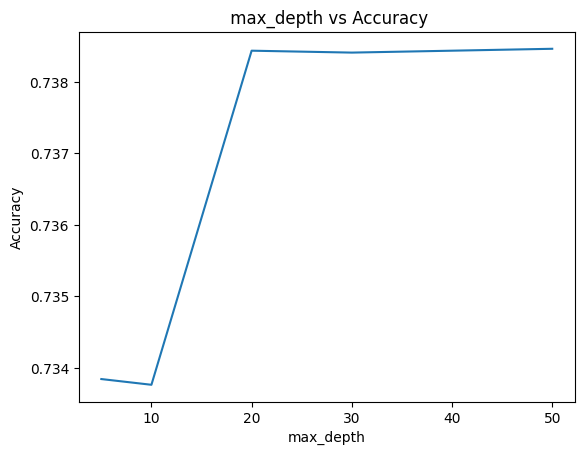

In [ ]:
max_depth= [0, 5, 10, 20, 30,50]
param_grid = {
    'max_depth': max_depth}
grid_search = GridSearchCV(rf_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=max_depth, y=accuracy_scores)
# Add labels and a title
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title(' max_depth vs Accuracy')
# Show the plot
plt.show()

Lesser max_depth results in trees that are simpler and less complex. But as you increase the
max_depth, the accuracy increases and starts decreasing after reaching the highest accuracy as the
model will start to overfit

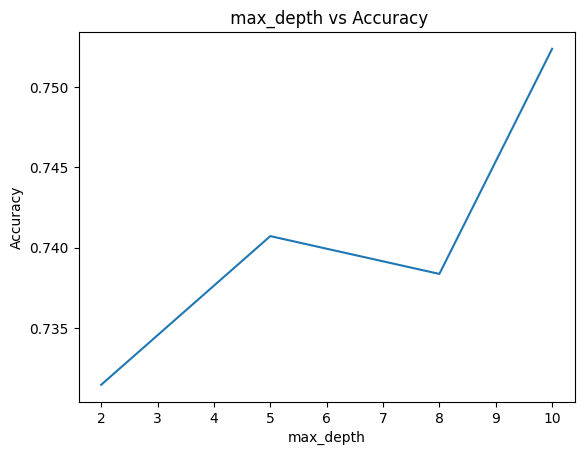

In [ ]:
min_samples_split= [1,2, 5, 8,10]
param_grid = {
    'min_samples_split': min_samples_split}
grid_search = GridSearchCV(rf_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=min_samples_split, y=accuracy_scores)
# Add labels and a title
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title(' max_depth vs Accuracy')
# Show the plot
plt.show()

A small “min samples split” means it allows the nodes to split even when there are less samples at
node, which may lead to overfitting

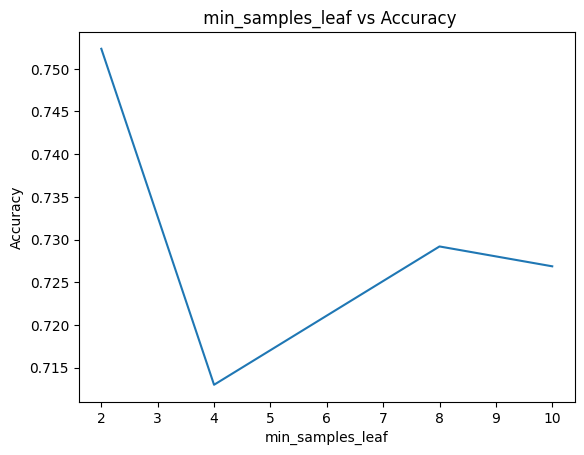

In [ ]:
min_samples_leaf= [2,4,8,10]  # Minimum number of samples required to be at a leaf node
param_grid = {
    'min_samples_leaf': min_samples_leaf}
grid_search = GridSearchCV(rf_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
accuracy_scores = results["mean_test_score"]
sns.lineplot(x=min_samples_leaf, y=accuracy_scores)
# Add labels and a title
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title(' min_samples_leaf vs Accuracy')
# Show the plot
plt.show()

increasing the min_samples_leaf makes the model underfit the data as the trees becomes shallower
and simpler, inturn reducing the overall accuracy.

Best hyperparameter / model

In [ ]:
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

Testing and validation

tuned hpyerparameters :(best parameters)  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
accuracy : 0.7638866613205025


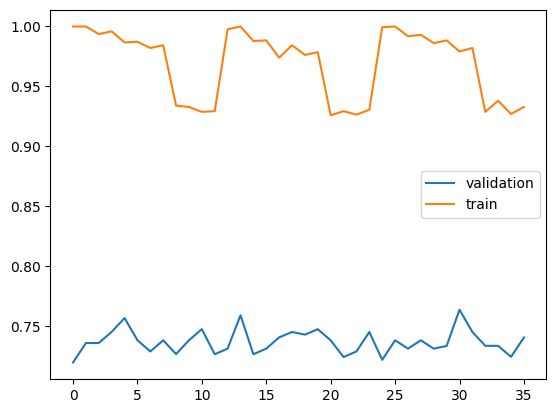

In [ ]:
grid_search = GridSearchCV(rf_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
plt.plot(validation_scores, label='validation')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Performance

In [ ]:
best_rf_clf_model = grid_search.best_estimator_
y_pred = best_rf_clf_model.predict(x_test)
# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Precision: 0.746253465003465
Recall: 0.7407407407407408
F1 Score: 0.7421488047273703
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.69      0.75      0.72        36
           2       0.70      0.72      0.71        36

    accuracy                           0.74       108
   macro avg       0.75      0.74      0.74       108
weighted avg       0.75      0.74      0.74       108



In [ ]:
rock_cat_df = rock_pca_df.copy()

Q5 - Ensemble classifier

In [ ]:
#Ensemble methods
#voting classifer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ("log", best_log_model),
    ("rf", best_rf_clf_model),
    ("svm", best_svm_model)
], voting="hard")
#ensemble_classifier = VotingClassifier(estimators = [("log",best_log_model),("rf",best_rf_clf_model)],voting="hard")
ensemble_classifier.fit(x_train,y_train)
ensemble_predictions = ensemble_classifier.predict(x_test)
# Evaluate the ensemble's performance
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)
for name, clf in ensemble_classifier.named_estimators_.items():
  print(name, "=", clf.score(x_test, y_test))

Ensemble Accuracy: 0.75
log = 0.05555555555555555
rf = 0.05555555555555555
svm = 0.07407407407407407


In [ ]:
#Ensemble methods
#voting classifer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ("log", best_log_model),
    ("rf", best_rf_clf_model),
    ("svm", best_svm_model)
], voting="soft")
#ensemble_classifier = VotingClassifier(estimators = [("log",best_log_model),("rf",best_rf_clf_model)],voting="hard")
ensemble_classifier.fit(x_train,y_train)
ensemble_predictions = ensemble_classifier.predict(x_test)
# Evaluate the ensemble's performance
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)
for name, clf in ensemble_classifier.named_estimators_.items():
  print(name, "=", clf.score(x_test, y_test))

Ensemble Accuracy: 0.75
log = 0.05555555555555555
rf = 0.05555555555555555
svm = 0.07407407407407407


Ensemble accuracy greater than other classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier

In [ ]:
adaBoostClassifier = AdaBoostClassifier(estimator=ensemble_classifier, n_estimators=100, algorithm='SAMME')
adaBoostClassifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=VotingClassifier(estimators=[('log',
                                                           LogisticRegression(C=20,
                                                                              max_iter=10)),
                                                          ('rf',
                                                           RandomForestClassifier(max_depth=20,
                                                                                  min_samples_leaf=2,
                                                                                  min_samples_split=5,
                                                                                  n_estimators=50)),
                                                          ('svm',
                                                           SVC(C=1, gamma=0.1,
                                                               probability=True))]),
                   n_estimators=100)

Test set accuracy

In [ ]:
ensemble_predictions = adaBoostClassifier.predict(x_test)
# Evaluate the ensemble's performance
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.7037037037037037


In [ ]:
''' voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test) '''

' voting_clf.voting = "soft"\nvoting_clf.named_estimators["svc"].probability = True\nvoting_clf.fit(X_train, y_train)\nvoting_clf.score(X_test, y_test) '

In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3,n_iter_no_change=20 )
gb_classifier.fit(x_train, y_train)
gb_predictions = gb_classifier.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

Gradient Boosting Classifier Accuracy: 0.7129629629629629


In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(estimators=[('lr', best_log_model),('rf', best_rf_clf_model),("svm", best_svm_model)],
                                   final_estimator=best_log_model,
                                   cv=10)
stacking_clf.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression(C=20, max_iter=10)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=50)),
                               ('svm', SVC(C=1, gamma=0.1, probability=True))],
                   final_estimator=LogisticRegression(C=20, max_iter=10))

In [ ]:
stacking_pred = stacking_clf.predict(x_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Gradient Boosting Classifier Accuracy:", stacking_accuracy)

Gradient Boosting Classifier Accuracy: 0.7314814814814815


Conclusion
Ensemble learning results indicate that logistic regression performs the most effectively after employing AdaBoost, when compared to logistic regression, random forest, and support vector classifier (SVC).

4c) Feature Importance continued

In [ ]:
# List of columns you want to convert
columns_to_convert = rock_cat_df.columns[1:]  # Replace this with the actual list of columns you want to convert

for column in columns_to_convert:
    if rock_cat_df[column].dtype == 'object':
        rock_cat_df[column] = rock_cat_df[column].astype('category').cat.codes

In [ ]:
x = rock_pca_df.drop(columns=["Category"])
y = rock_pca_df["Category"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)
rf_clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Precision: 0.7700929152148664
Recall: 0.7685185185185185
F1 Score: 0.7673348468708867
              precision    recall  f1-score   support

           1       0.83      0.81      0.82        36
           2       0.73      0.83      0.78        36
           3       0.75      0.67      0.71        36

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108



Feature ranking:
1. feature 0 (0.140257)
2. feature 5 (0.134602)
3. feature 3 (0.094038)
4. feature 11 (0.087138)
5. feature 4 (0.086000)
6. feature 1 (0.081579)
7. feature 2 (0.071271)
8. feature 7 (0.066463)
9. feature 10 (0.065270)
10. feature 9 (0.061821)
11. feature 6 (0.057113)
12. feature 8 (0.054448)


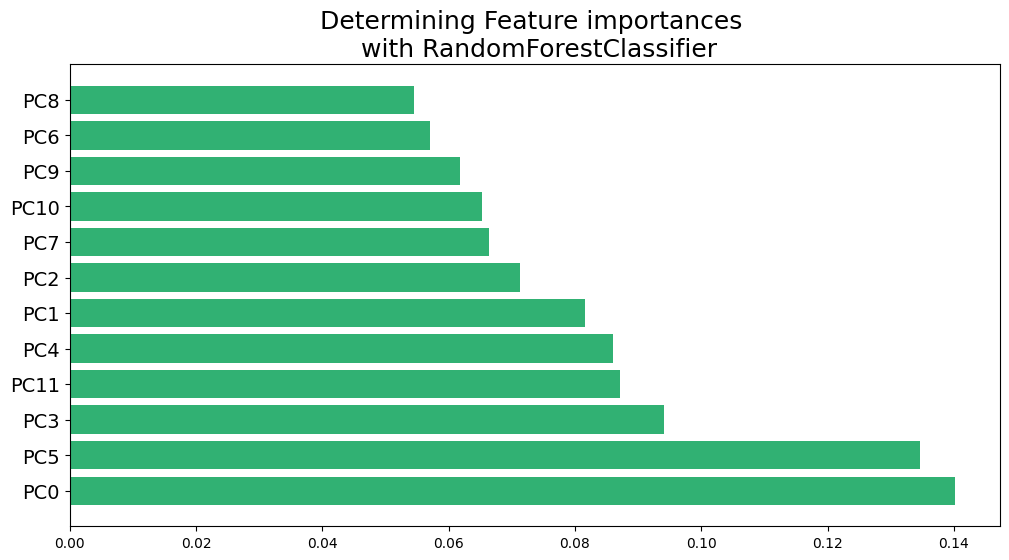

In [ ]:
importances = rf_clf.feature_importances_
feature_names = x_test.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with RandomForestClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])

feature_importance_graph(indices, importances, feature_names)
plt.show()